**SUBMISSION 1 - PREDICTIVE ANALYTICS**
- **Nama:** Soraya Indah Setiani
- **Email:** sorayaindahs58@gmail.com
- **ID Dicoding:** sorayasetiani

# **Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import pointbiserialr
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

# **Data Understanding**

## **Data Loading**

In [ ]:
url = 'https://drive.google.com/file/d/1vadfxmry-PrWCsiwCIE9J5WcpxwGW8pJ/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
diabetes_df = pd.read_csv(path)
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Output kode di atas memberikan informasi:

Dataset terdiri dari 100000 baris dan 9 kolom yaitu: gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level, dan diabetes.

## **Exploratory Data Analysis**

## **Deskripsi Variabel**

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


**Keterangan variabel:**

`gender`: jenis kelamin responden

`age`: usia responden (dalam tahun)

`hypertension`:  hipertensi (0 = tidak, 1 = ya)

`heart_disease`:  penyakit jantung (0 = tidak, 1 = ya)

`smoking_history`:  merokok responden

`bmi`: indeks massa tubuh responden

`HbA1c_level`: kadar HbA1c (hemoglobin terglikasi)

`blood_glucose_level`: kadar glukosa darah saat pemeriksaan

`diabetes`: status diabetes responden (0 = tidak, 1 = ya) – target variabel

Berdasarkan output kode, diperoleh informasi bahwa:


*   Dataset memiliki 3 kolom dengan tipe object, yaitu gender dan smoking_history. Kolom ini termasuk kategorik (fitur non-numerik).
*   Terdapat 3 kolom numerik dengan tipe data float64 yaitu age, bmi, dan HbA1c_level.
*   Terdapat 4 kolom numerik dengan tipe data int64, yaitu hypertension, heart_disease, blood_glucose_level, dan diabetes.
*   Kolom diabetes merupakan target.

## **Cek Summary**

Summary dilakukan pada data numerik, sehingga kolom heypertension, heart_disease, dan diabetes yang masih bertipe float64 perlu diubah ke object terlebih dahulu karena merupakan kolom yang berisi kategori (0=tidak dan 1=ya).

In [ ]:
# Mengubah tipe data kolom heypertension, heart_disease, dan diabetes menjadi object
diabetes_df['hypertension'] = diabetes_df['hypertension'].astype('object')
diabetes_df['heart_disease'] = diabetes_df['heart_disease'].astype('object')
diabetes_df['diabetes'] = diabetes_df['diabetes'].astype('object')

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  object 
 3   heart_disease        100000 non-null  object 
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 6.9+ MB


In [ ]:
diabetes_df.describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


`age` (usia)
*   Rata-rata usia pasien: 41.89 tahun dengan rentang 0.08 sampai 80 tahun.
*   Sekitar 75% pasien berusia kurang dari atau sama dengan 60 tahun.
*   Std dev: 22.52 menunjukkan penyebaran usia yang cukup luas.

`bmi` (Indeks Massa Tubuh)
*   Mean: 27.32 menunjukkan rata-rata BMI di kategori overweight.
*   Std dev: 6.64 menunjukkan variasi BMI cukup besar

`HbA1c_level` (Hemoglobin terglikasi)
*   Rata-rata pasien memiliki Hemoglobin terglikasi 5.53.
*   Sekitar 75% responden memiliki nilai HbA1c kurang dari atau sama dengan 6.2%.

`blood_glucose_level` (glukosa darah)
*   Rata-rata pasien memiliki glukosa darah 138.06 mg/dL.
*   Sekitar 75% responden memiliki glukosa darah 159 mg/dL.



## **Identifikasi Missing Value**

**Identifikasi missing value setiap kolom**

In [ ]:
diabetes_df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


Secara keseluruhan, tidak terdapat kolom yang memiliki missing valu, namun perlu diidentifikasi lebih lanjut terutama pada kolom yang memiliki tipe data float64

**Mengidentifikasi kolom age, HbA1c_level, dan blood_glucose_level (float64) yang memiliki nilai 0**

In [ ]:
age = (diabetes_df.age == 0).sum()
HbA1c_level = (diabetes_df.HbA1c_level == 0).sum()
blood_glucose_level = (diabetes_df.blood_glucose_level == 0).sum()

print("Nilai 0 di kolom age ada: ", age)
print("Nilai 0 di kolom HbA1c_level ada: ", HbA1c_level)
print("Nilai 0 di kolom blood_glucose_level ada: ", blood_glucose_level)

Nilai 0 di kolom age ada:  0
Nilai 0 di kolom HbA1c_level ada:  0
Nilai 0 di kolom blood_glucose_level ada:  0


Berdasarkan identifikasi, tidak ada missing valuepada kolom age, HbA1c_level, dan blood_glucose_level yang harus ditangani.

## **Identifikasi Duplikasi Data**

In [ ]:
diabetes_df.duplicated().sum()

np.int64(3854)

Kode tersebut menunjukkan bahwa dataset memiliki duplikasi sebanyak 3854 baris yang harus dibersihkan.

## **Univariate Exploratory Data Analysis**

Pada tahap ini akan mengidentifikasi outlier dan unique pada setiap fitur.




In [ ]:
# Membagi fitur menjadi 2 bagian
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']

**Fitur gender**

        jumlah sampel  persentase
gender                           
Female          58552        58.6
Male            41430        41.4
Other              18         0.0


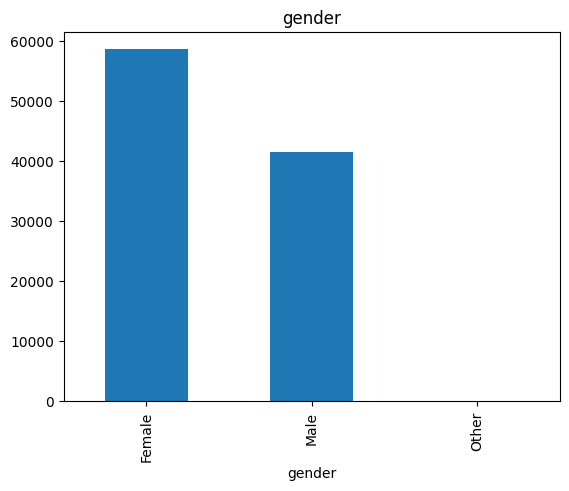

In [ ]:
feature = categorical_features[0]
count = diabetes_df[feature].value_counts()
percent = 100*diabetes_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan identifikasi, terlihat bahwa kolom gender berisi 3 kategori, yaitu Female sebanyak 58552 (58.6%), Male sebanyak 41430 (41.4%), dan Other sebanyak 18 (kurang dari 1%). Pada dasarnya gender terdiri dari 2 kategori, yaitu Female dan Male saja, sehingga 18 baris yang kolom Gender berisi Other sebaiknya dihapus agar tidak menimbulkan bias.

**Fitur age**

In [ ]:
diabetes_df['age'].value_counts()

,count
age,
80.00,5621
51.00,1619
47.00,1574
48.00,1568
53.00,1542
...,...
0.48,83
1.00,83
0.40,66


Berdasarkan identifikasi, terlihat bahwa terdapat beberapa usia yang tidak sesuai, seperti dalam bentuk desimal. Oleh karena itu, perlu dibersihkan untuk mempermudah analisis dan tidak menimbulkan bias.

**Fitur hypertension**

              jumlah sampel  persentase
hypertension                           
0                     92515        92.5
1                      7485         7.5


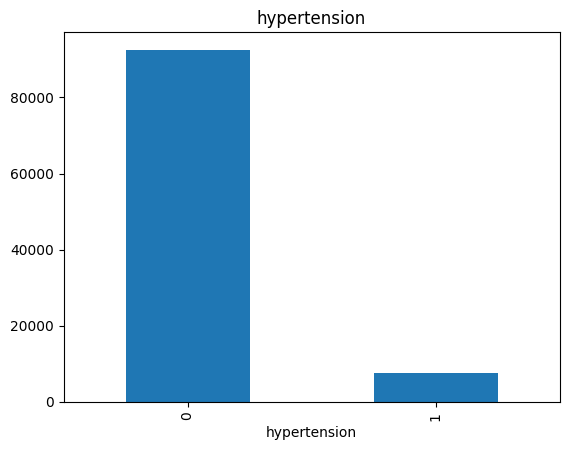

In [ ]:
feature = categorical_features[1]
count = diabetes_df[feature].value_counts()
percent = 100*diabetes_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Kolom hypertension tidak memiliki outlier karena kategori sesuai, yaitu 0 (tidak memiliki hipertensi) dan 1 (memiliki hipertensi).

Terdapat 2 kategori dalam fitur hypertension, yaitu 0 (tidak memiliki  hipertensi) dan 1 (memiliki  hipertensi). Sebesar 92.5% pasien tidak memiliki  hipertensi dan 7.5% pasien memiliki  hipertensi.

**Fitur heart_disease**

               jumlah sampel  persentase
heart_disease                           
0                      96058        96.1
1                       3942         3.9


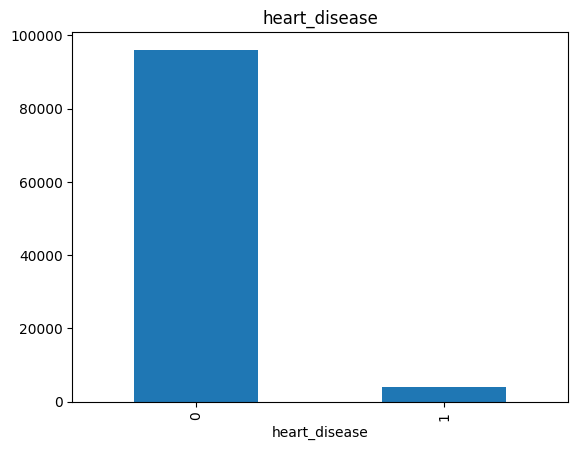

In [ ]:
feature = categorical_features[2]
count = diabetes_df[feature].value_counts()
percent = 100*diabetes_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Kolom heart_disease tidak memiliki outlier karena kategori sesuai, yaitu 0 (tidak memiliki penyakit jantung) dan 1 (memiliki penyakit jantung).

Terdapat 2 kategori dalam fitur heart_disease, yaitu 0 (tidak memiliki penyakit jantung) dan 1 (memiliki penyakit jantung). Sebesar 96.1% pasien tidak memiliki penyakit jantung dan 3.9% pasien memiliki penyakit jantung.

**Fitur smoking_history**

                 jumlah sampel  persentase
smoking_history                           
No Info                  35816        35.8
never                    35095        35.1
former                    9352         9.4
current                   9286         9.3
not current               6447         6.4
ever                      4004         4.0


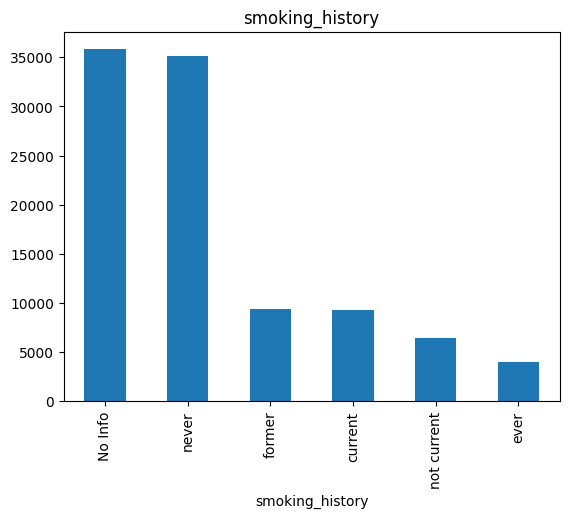

In [ ]:
feature = categorical_features[3]
count = diabetes_df[feature].value_counts()
percent = 100*diabetes_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan identifikasi, kolom smoking_history berisi 6 kategori, yaitu No Info, never, former, current, not current, dan ever. Untuk mempermudah analisis, sebaiknya dikategorikan lagi menjadi never (tidak pernah merokok), ever (pernah tapi sudah tidak merokok), dan current (saat ini perokok). Untuk former dan not current dapat dikategorikan ke ever karena sama-sama pernah merokok, tetapi saat ini sudah tidak merokok. Selanjutnya, kategori No Info sebanyak  35816 dipertahankan agar tidak menghilangkan banyak informasi karena frekuensinya yang sangat besar.

**Fitur bmi**


<Axes: xlabel='bmi'>

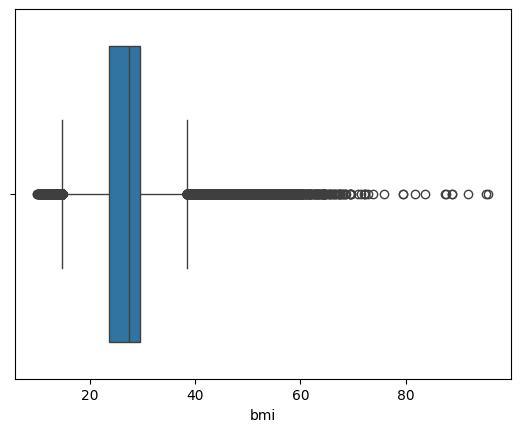

In [ ]:
# Identifikasi bmi menggunakan boxplot
sns.boxplot(x=diabetes_df['bmi'])

bmi > 60 perlu dihapus karena di luar batas maksimal dan tidak relevan secara medis pada umumnya.

**Fitur HbA1c_level**

<Axes: xlabel='HbA1c_level'>

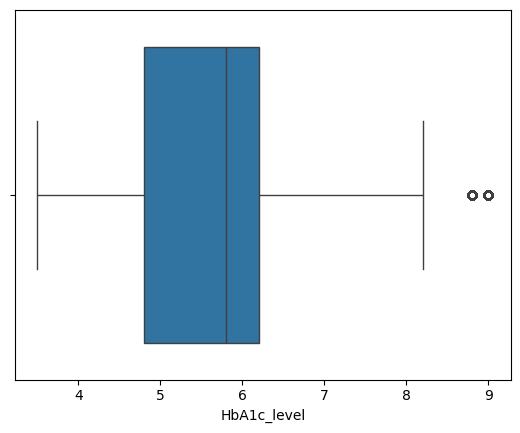

In [ ]:
# Identifikasi HbA1c_level menggunakan boxplot
sns.boxplot(x=diabetes_df['HbA1c_level'])

Terlihat bahwa kolom HbA1c_level memiliki banyak outliers, namun tidak perlu dihapus karena angka tersebut masih relevan secara medis.

**Fitur diabetes**

          jumlah sampel  persentase
diabetes                           
0                 91500        91.5
1                  8500         8.5


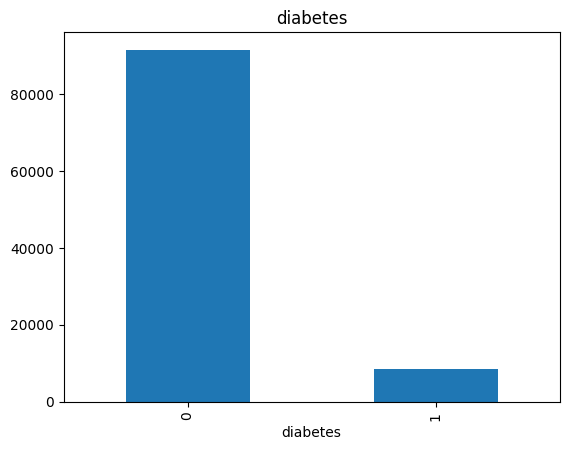

In [ ]:
feature = categorical_features[4]
count = diabetes_df[feature].value_counts()
percent = 100*diabetes_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Analisis plot pada fitur numerik**

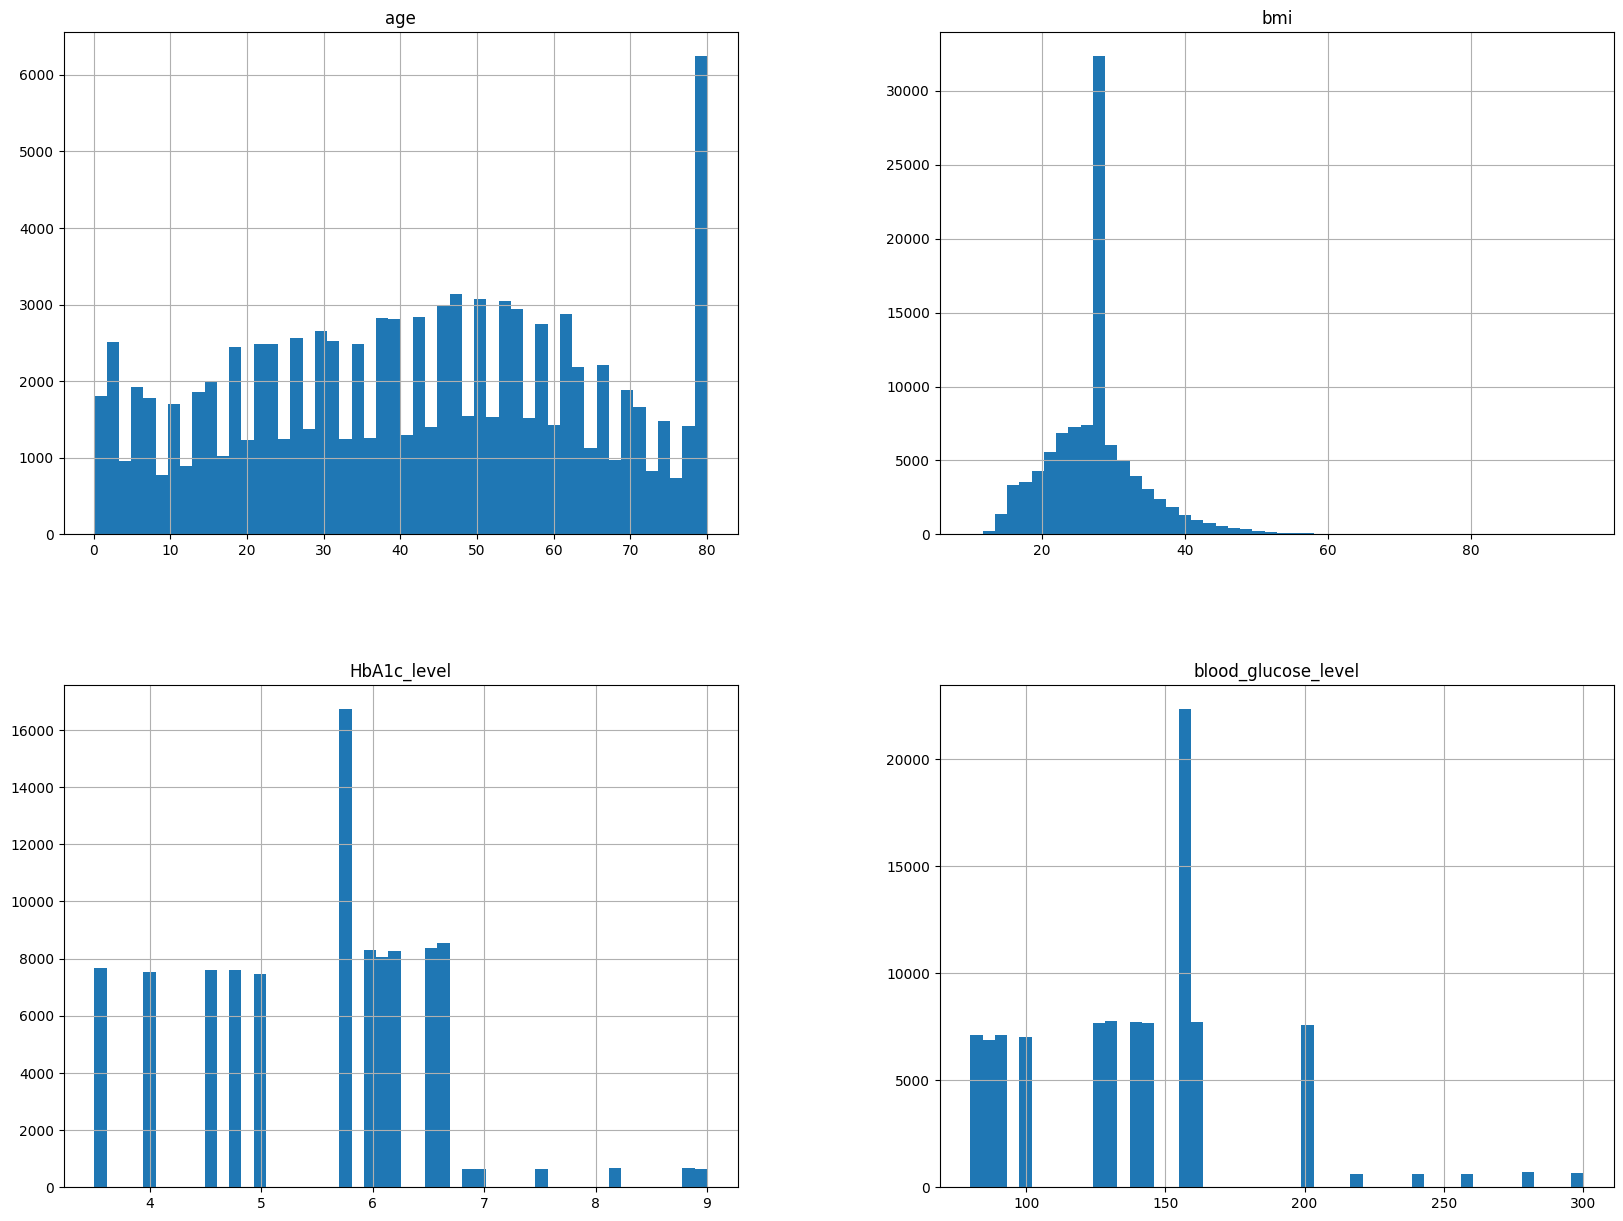

In [ ]:
diabetes_df.hist(bins=50, figsize=(20,15))
plt.show()

Histogram di atas menunjukkan bahwa:
*   Distribusi usia cukup merata dari usia 0 sampai 80 tahun dan memperlihatkan bahwa sebagian besar pasien berada di usia produktif dan lansia. Terjadi lonjakan di usia 80 tahun.
*   Distribusi bmi secara umum right-skewed, yang berarti banyak pasien yang memiliki BMI lebih tinggi dari normal. Terjadi lonjakan di sekitar angka 28.
*   Distribusi HbA1c tidak berbentuk normal dan terjadi lonjakan di sekitar angka 6.
*   blood_glucose_level tersebar dari sekitar 70 hingga hampir 300, tetapi dengan dominasi jumlah sampel pada angka-angka tertentu. Terjadi lonjakan besar pada nilai sekitar 155.


## **Multivariate Exploratory Data Analysis**

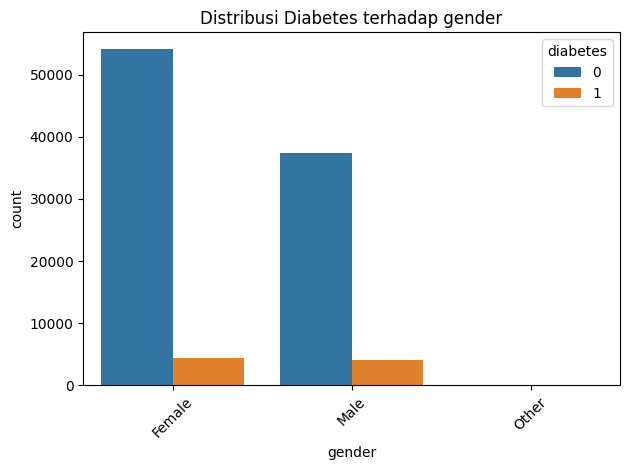

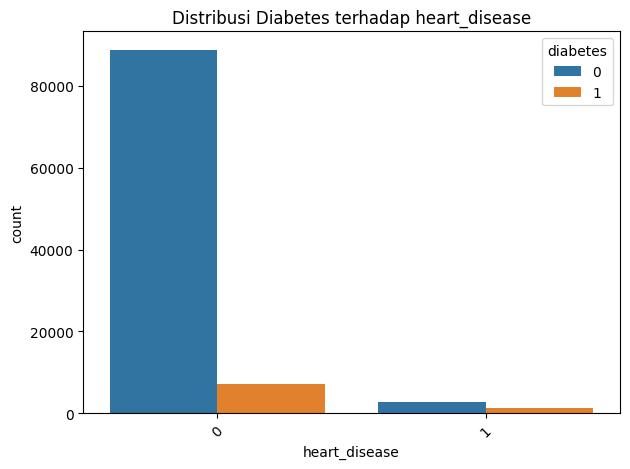

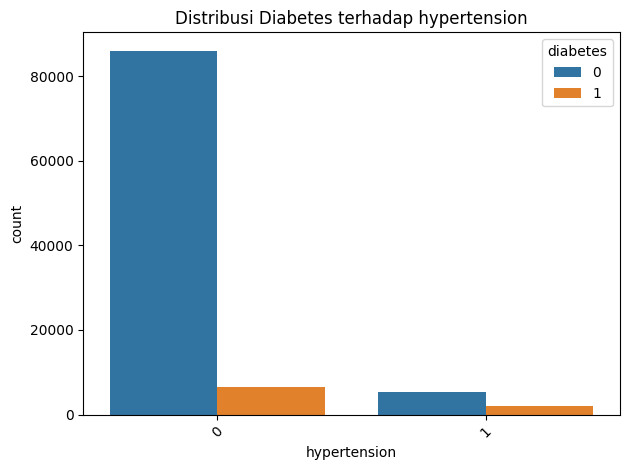

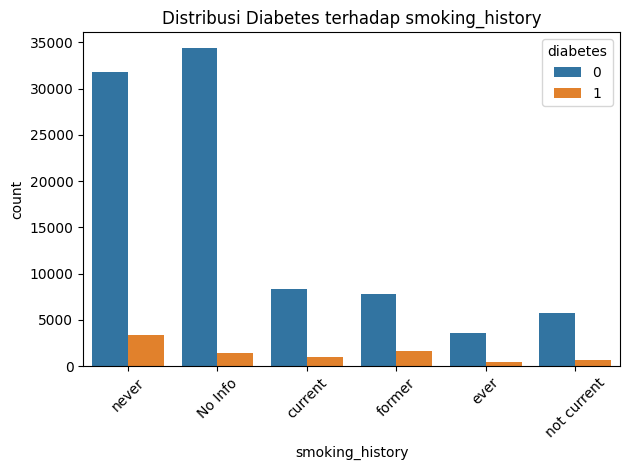

In [ ]:
cat_features = diabetes_df.select_dtypes(include='object').columns.difference(['diabetes']).to_list()
for col in cat_features:
    sns.countplot(x=col, hue='diabetes', data=diabetes_df)
    plt.title(f'Distribusi Diabetes terhadap {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Berdasarkan visualisasi distribusi diabetes terhadap fitur kategorik, berikut interpretasinya:

`gender`
*   Mayoritas pasien memiliki gender Female.
*   Perbandingan jumlah pasien yang tidak menderita diabetes pada Female dan Male cukup signifikan.
*   Perbandingan jumlah pasien yang menderita diabetes pada Female dan Male hampir memiliki proporsi yang sama.

`heart_disease`
*   Mayoritas pasien tidak memiliki penyakit jantung
*   Perbandingan jumlah pasien yang tidak menderita diabetes pada pasien yang tidak memiliki penyakit jantung dan memiliki penyakit jantung cukup signifikan.
*   Perbandingan jumlah pasien yang menderita diabetes pada pasien yang tidak memiliki penyakit jantung dan memiliki penyakit jantung hampir memiliki proporsi yang sama.

`hypertension`
*   Perbandingan jumlah pasien yang tidak memiliki hipertensi dan memiliki hipertensi sangat signifikan.
*   Perbandingan jumlah pasien yang tidak menderita diabetes pada pasien yang tidak memiliki hipertensi dan memiliki hipertensi cukup signifikan.
*   Perbandingan jumlah pasien yang menderita diabetes pada pasien yang tidak memiliki hipertensi dan memiliki hipertensi hampir memiliki proporsi yang sama.

`smoking_history`
*   Jumlah orang yang tidak merokok dan yang tidak memberi informasi riwayat merokok cukup besar. Jumlah penderita diabetes dalam kategori ini relatif lebih kecil secara proporsi dibanding total populasi kategori tersebut.
*  Total pasien yang saat ini perokok lebih kecil dibanding kategori lain dan jumlah penderita diabetes pada kategori ini tidak berbeda signifikan/proporsi sebanding dengan total pasien yang saat ini perokok.
*  Total pasien yang pernah tapi sudah tidak merokok lebih tinggi dibanding kategori current dan lebih rendah dibanding kategori lain. Jumlah penderita diabetes pada kategori ini tidak berbeda signifikan/proporsi sebanding dengan total pasien yang pernah tapi sudah tidak merokok.


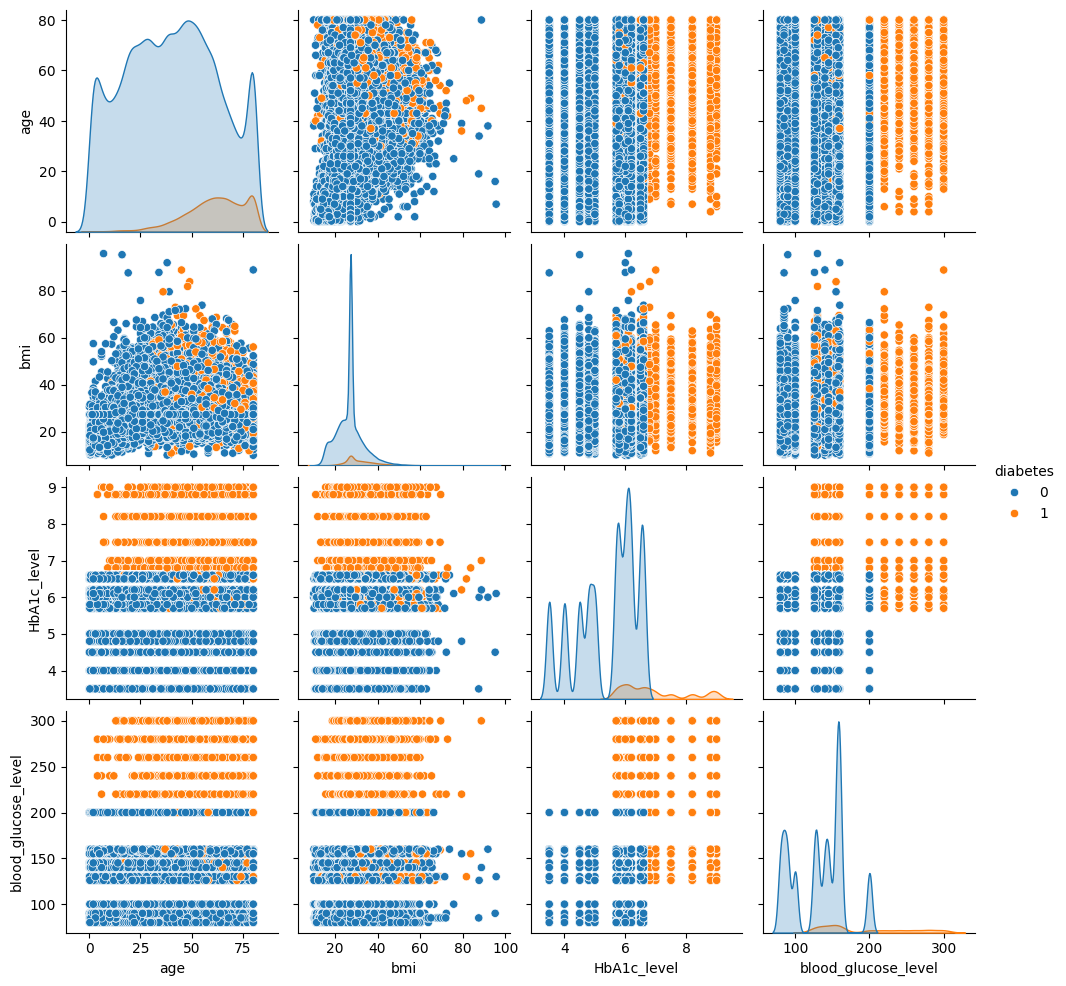

In [ ]:
# Pairplot dengan hue berdasarkan target kategorik
sns.pairplot(diabetes_df[numerical_features + ['diabetes']], hue='diabetes', diag_kind='kde')
plt.show()

Plot di atas memberikan informasi bahwa:


*   age: Distribusi usia pasien penderita diabetes cenderung lebih tinggi di usia dewasa-tua, dibandingkan dengan yang tidak diabetes yang tersebar lebih luas, termasuk usia muda.
*   bmi: Distribusi bmi terlihat tidak jauh berbeda antara dua kelas, tetapi persebaran pasien yang memiliki diabetes sedikit lebih padat di rentang bmi > 25 (overweight/obesitas).
*   HbA1c_level: Perbedaan sangat signifikan, pasien penderita diabetes dominan pada nilai HbA1c di atas 6.5, sedangkan non-diabetes lebih banyak di bawah 6.5. Hal ini relevan secara medis.
*   blood_glucose_level: Perbedaan sangat signifikan, pasien penderita diabetes cenderung berada di nilai glukosa darah yang jauh lebih tinggi (≥ 200) dibandingkan yang non-diabetes.


*   HbA1c_level vs blood_glucose_level: Terdapat hubungan positif walaupun tidak linier sempurna. Penderita diabetes cenderung memiliki HbA1c dan glukosa darah tinggi secara bersamaan. Titik oranye terkonsentrasi di kanan atas.

*   age vs HbA1c_level/blood_glucose_level: Usia tidak terlalu berkorelasi langsung, tetapi penderita diabetes cenderung berada pada rentang usia pertengahan hingga lanjut.

*   bmi vs fitur lainnya: Tidak ada korelasi kuat, tapi ada kecenderungan penderita diabetes muncul lebih banyak di BMI tinggi.


# **Data Preparation**

## **Membersihkan Outlier, Missing Value, atau Data yag tidak Relevan**

1) Berdasarkan exploratory data pada fitur `gender` yang telah dilakukan, berikut jumlah data pada fitur `gender `setelah kategori Other dihapus.

In [ ]:
# Menghilangkan kategori Other pada kolom Gender
diabetes_df = diabetes_df[diabetes_df['gender'] != 'Other']

In [ ]:
# count dan persentase gender
value_counts = diabetes_df['gender'].value_counts()
value_percent = diabetes_df['gender'].value_counts(normalize=True) * 100
#output
result = pd.DataFrame({
    'count': value_counts,
    'percentage (%)': value_percent.round(1)
}).reset_index()

result.columns = ['gender', 'count', 'percentage (%)']
print(result)

   gender  count  percentage (%)
0       0  55514            58.5
1       1  39386            41.5


2) Berdasarkan exploratory data pada fitur `age` yang telah dilakukan, terdapat beberapa nilai yang tidak sesuai, seperti angka desimal dan kurang dari 1.

In [ ]:
# Menghapus baris dengan age < 1
diabetes_df = diabetes_df[diabetes_df['age'] >= 1]

In [ ]:
# Mengubah tipe data kolom age menjadi int64 agar lebih mudah dianalisis
diabetes_df['age'] = diabetes_df['age'].astype('int64')

<Axes: xlabel='age'>

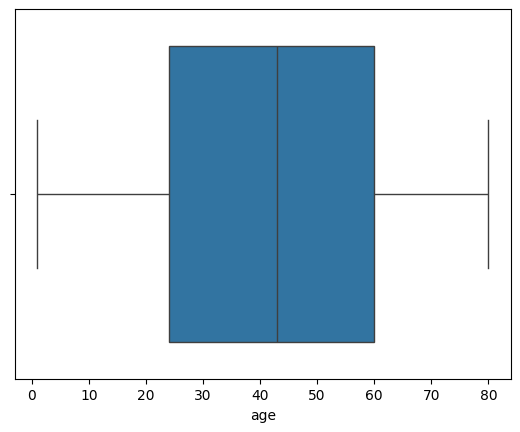

In [ ]:
#boxplot
sns.boxplot(x=diabetes_df['age'])

3) Membersihkan `bmi` > 60 karena termasuk outlier.

In [ ]:
diabetes_df = diabetes_df[diabetes_df['bmi'] < 60]

<Axes: xlabel='bmi'>

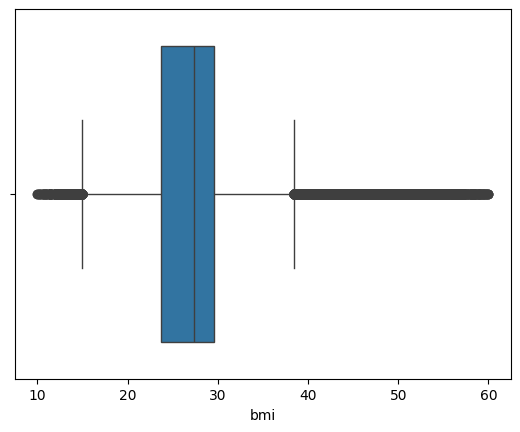

In [ ]:
# boxplot bmi
sns.boxplot(x=diabetes_df['bmi'])

## **Mengubah Kategori**

Mengubah kategori former, current, not current pada fitur `smoking_history` menjadi ever untuk mempermudah analisis.

In [ ]:
diabetes_df['smoking_history'] = diabetes_df['smoking_history'].replace(['former', 'not current'], 'ever')

value_counts = diabetes_df['smoking_history'].value_counts()
value_percent = diabetes_df['smoking_history'].value_counts(normalize=True) * 100
result = pd.DataFrame({
    'count': value_counts,
    'percentage (%)': value_percent.round(1)
}).reset_index()

result.columns = ['smoking_history', 'count', 'percentage (%)']
print(result)


  smoking_history  count  percentage (%)
0           never  35002            35.4
1         No Info  34917            35.3
2            ever  19766            20.0
3         current   9270             9.4


## **Menghapus Duplikasi Data**

Berdasarkan identifikasi duplikasi data,terdapat duplikasi sebanyak 3854 baris yang harus dibersihkan.

In [ ]:
diabetes_df.drop_duplicates(inplace=True)

In [ ]:
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36,0,0,No Info,24.60,4.8,145,0
99996,Female,2,0,0,No Info,17.37,6.5,100,0
99997,Male,66,0,0,ever,27.83,5.7,155,0
99998,Female,24,0,0,never,35.42,4.0,100,0


## **Cek Korelasi**

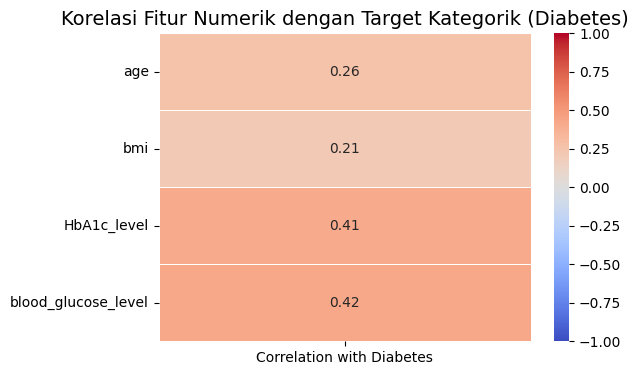

In [ ]:
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
correlations = {}
# Hitung korelasi antara tiap fitur numerik dan target kategorik biner
for col in numerical_features:
    corr, _ = pointbiserialr(diabetes_df[col], diabetes_df['diabetes'].astype(int))  # pastikan target dalam bentuk 0/1
    correlations[col] = round(corr, 3)

# Konversi ke DataFrame
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation with Diabetes'])

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Korelasi Fitur Numerik dengan Target Kategorik (Diabetes)", fontsize=14)
plt.show()

## **Encoding Fitur Kategori**

Proses encoding variabel kategorikal menggunakan LabelEncoder untuk mengubah data teks menjadi format numerik yang dapat diproses saat membuat model. Kolom seperti smoking_history, gender, hypertension, heart_disease, dan diabetes diubah nilainya menjadi angka sesuai urutan kategorinya.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Apply fit_transform directly to the 'smoking_history' column of diabetes_df
diabetes_df['smoking_history'] = le.fit_transform(diabetes_df['smoking_history'])
diabetes_df['gender'] = le.fit_transform(diabetes_df['gender'])
diabetes_df['hypertension'] = le.fit_transform(diabetes_df['hypertension'])
diabetes_df['heart_disease'] = le.fit_transform(diabetes_df['heart_disease'])
diabetes_df['diabetes'] = le.fit_transform(diabetes_df['diabetes'])

In [ ]:
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,3,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,3,27.32,5.7,158,0
3,0,36,0,0,1,23.45,5.0,155,0
4,1,76,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36,0,0,0,24.60,4.8,145,0
99996,0,2,0,0,0,17.37,6.5,100,0
99997,1,66,0,0,2,27.83,5.7,155,0
99998,0,24,0,0,3,35.42,4.0,100,0


## **Train-Test-Split**

Sebelum melakukan pemodelan, data dibagi menjadi data training sebanyak 80% dan data testing sebanyak 20%.

In [ ]:
X = diabetes_df.drop('diabetes', axis=1)
y = diabetes_df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 94900
Total # of sample in train dataset: 75920
Total # of sample in test dataset: 18980


## **Standarisasi**

Standarisasi diterapkan pada fitur numerik menggunakan StandardScaler yang bertujuan untuk mengubah skala data agar memiliki rata-rata 0 dan standar deviasi 1. Hal ini dapat menyeimbangkan sakala antarfitur.

In [ ]:
X = diabetes_df.drop('diabetes', axis=1)
y = diabetes_df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = ['age', 'bmi', 'HbA1c_level','blood_glucose_level']
scaler = StandardScaler()
print(type(X_train))
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

X_train[numerical_features].head()

<class 'pandas.core.frame.DataFrame'>


,age,bmi,HbA1c_level,blood_glucose_level
11222,0.127926,-0.007486,0.248233,0.410090
7650,-1.626807,-0.007486,0.155066,0.507701
58754,1.072783,2.585249,0.434567,0.410090
51644,-1.851772,-1.879173,0.620902,0.044048
23913,1.342742,-0.007486,0.155066,0.483298


Proses standarisasi mengubah nilai mean menjadi 0 dan nilai standar deviasi menjadi 1.

In [ ]:
X_train[numerical_features].describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,7.592000e+04,7.592000e+04,7.592000e+04,7.592000e+04
mean,1.431942e-17,1.978045e-16,-1.005074e-15,-1.373916e-16
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-1.851772e+00,-2.635134e+00,-1.894611e+00,-1.420121e+00
25%,-8.169298e-01,-5.858416e-01,-6.834383e-01,-9.320645e-01
50%,3.794016e-02,-7.485660e-03,2.482330e-01,4.404751e-02
75%,8.028238e-01,3.871929e-01,6.209015e-01,5.077007e-01
max,1.702687e+00,4.951802e+00,3.229581e+00,3.948496e+00


In [ ]:
print(X_train[numerical_features].mean())
print(X_train[numerical_features].std())

age                    1.431942e-17
bmi                    1.978045e-16
HbA1c_level           -1.005074e-15
blood_glucose_level   -1.373916e-16
dtype: float64
age                    1.000007
bmi                    1.000007
HbA1c_level            1.000007
blood_glucose_level    1.000007
dtype: float64


*   Nilai mean untuk fitur numerik (age, bmi, HbA1c_level, blood_glucose_level) sangat mendekati 0.
*   Nilai st deviasi semua fitur tersebut adalah 1.000007, yang sangat dekat dengan 1.
*   Ketidaksempurnaan (tidak bulat 0 dan 1) disebabkan oleh beberapa presisi dalam komputasi.





# **Model Development: K-Nearest Neighbor**

Menyiapkan data frame untuk analisis ketiga model tersebut lebih dahulu.

In [ ]:
models = pd.DataFrame(index=['train_acc', 'test_acc'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

Selanjutnya, melatih data dengan KNN. Sebelum membuat model, perlu diketahui nilai neighbor terbaik.

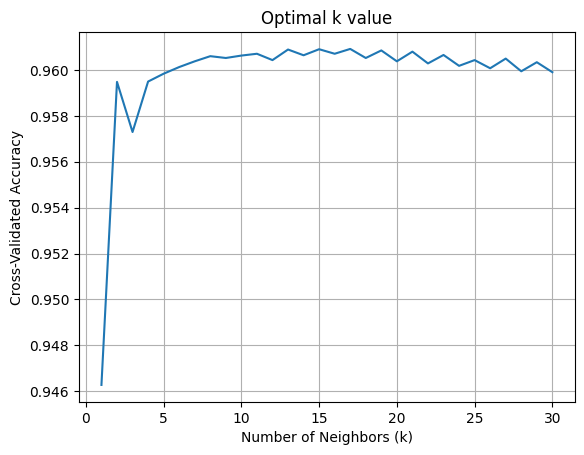

Nilai k terbaik: 17


In [ ]:
# Menguji nilai k dari 1 sampai 30
k_values = range(1, 31)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    cv_scores.append(scores.mean())

# Plot hasil akurasi vs k
plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Optimal k value')
plt.grid()
plt.show()

# Menampilkan nilai k dengan akurasi tertinggi
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f"Nilai k terbaik: {optimal_k}")

In [ ]:
# Inisialisasi model KNN untuk klasifikasi
knn_model = KNeighborsClassifier(n_neighbors=17)

# Melatih model KNN
y_train = y_train.astype(int)
y_test = y_test.astype(int)
knn_model.fit(X_train, y_train)

# Prediksi
y_pred_train_knn = knn_model.predict(X_train)
y_pred_test_knn = knn_model.predict(X_test)

Parameter model KNN:
- Pada analisis ini, KNN menggunakan parameter n_neighbors=17 yang berarti model akan mempertimbangkan 17 tetangga terdekat dalam menentukan kelas suatu data. Label yang paling banyak muncul di antara 17 tetangga akan dijadikan hasil prediksi.
- y_train = y_train.astype(int) dan y_test = y_test.astype(int) untuk memastikan bahwa label target berupa angka integer karena KNN membutuhkan label yang bisa dihitung frekuensinya.
- knn_model.fit(X_train, y_train) untuk melatih model dengan menyimpan seluruh data latih dan akan mencari tetangga saat prediksi dilakukan.
- y_pred_train_knn = knn_model.predict(X_train)
Untuk memprediksi hasil pada data latih.
- y_pred_test_knn = knn_model.predict(X_test) untuk memprediksi hasil pada data uji/test.

Cara kerja KNN:
- KNN mengklasifikasikan suatu data uji dengan melihat tetangga terdekatnya di data latih.
- Menghitung jarak antara data uji dengan seluruh data latih.
- Mengambil 17 tetangga terdekat karena n_neighbors=17.
- Menentukan label berdasarkan mayoritas tetangga tersebut.

Kelebihan model KNN:
- Mudah melakukan klasifikasi, cukup dengan melihat tetangga terdekat.
- Tidak memerlukan pelatihan model kompleks.

Kekurangan model KNN:

Curse of Dimensionality, yaitu saat jumlah fitur (dimensi) bertambah banyak, semua data cenderung memiliki jarak sama, sehingga konsep tetangga terdekat sulit dianalisis.

# **Model Development: Random Forest**

In [ ]:
# Inisialisasi model Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)

# Training model
rf_model.fit(X_train, y_train)

# Prediksi khusus untuk Random Forest
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

Parameter model Random Forest:

- n_estimator: jumlah trees di forest. Pada analisis ini menggunakan n_estimators=50 yang berarti jumlah pohon keputusan (decision trees) yang dibentuk dalam ensemble Random Forest sebanyak 50.
- max_depth: kedalaman atau panjang pohon yang merupakan ukuran seberapa banyak pohon dapat melakukan splitting untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan. max_depth=16 artinya setiap pohon boleh bercabang hingga 16 level
- random_state: digunakan untuk mengontrol angka acak generator yang digunakan. random_state=55, angka 55 tidak punya makna khusus, tetapi merupakan nilai tetap.
- n_jobs: jumlah job yang digunakan secara paralel yang merupakan komponen untuk mengontrol thread atau proses yang berjalan secara paralel. n_jobs=-1 artinya semua proses berjalan secara paralel.
- predict(X_train): untuk melihat performa model di data training.
- predict(X_test): untuk menguji generalisasi model ke data yang belum pernah dilihat.

Cara kerja model Random Forest:
- Model membuat 50 pohon keputusan karena n_estimators=50.
- Setiap pohon dilatih pada subset acak dari data latih.
- Kedalaman maksimum pohon dibatasi sampai 16 level agar tidak terlalu kompleks dan menghindari overfitting.
- Setelah semua pohon terbentuk, prediksi akhir dilakukan dengan melihat dari mayoritas pohon yang terbentuk.


Kelebihan model Random Forest:
- Akurasi tinggi
- Adanya pohon-pohon yang terbentuk membuat model lebih stabil dan tidak mudah overfitting.

Kekurangan:

- Kurang interpretatif karena terlalu banyak pohon, sehingga sulit dipahami.
- Membutuhkan waktu lebih lama karena training banyak pohon.

# **Evaluasi Model**

Untuk mengevaluasi model KNN dan Random Forest dalam melakukan prediksi diabetes, diperlukan evaluasi menggunakan metrik sebagai berikut.

- Accuracy: proporsi prediksi benar.
- Precision: Proporsi data yang diprediksi positif (menderita diabetes) dan true positif.
- Recall (Sensitivity): Proporsi data positif aktual (menderita diabetes)sebenarnya yang berhasil dikenali oleh model.
- F1-Score: Keseimbangan antara ketepatan (precision) dan kelengkapan deteksi (recall).
- Confusion Matrix: Matriks untuk melihat performa klasifikasi per kelas (true positive, false positive, true negative, dan false negative).


In [ ]:
models = pd.DataFrame(index=['train_acc', 'test_acc'],
                      columns=['KNN', 'RF'])

In [ ]:
# Simpan skor ke DataFrame 'models' (dengan label khusus)
models.loc['train_acc', 'KNN'] = accuracy_score(y_train, y_pred_train_knn)
models.loc['test_acc', 'KNN'] = accuracy_score(y_test, y_pred_test_knn)

# Laporan klasifikasi KNN
print("KNN Classification Report (Test):")
print(classification_report(y_test, y_pred_test_knn))

# Confusion matrix KNN
print("KNN Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test_knn))

KNN Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17270
           1       0.95      0.57      0.72      1710

    accuracy                           0.96     18980
   macro avg       0.96      0.79      0.85     18980
weighted avg       0.96      0.96      0.95     18980

KNN Confusion Matrix (Test):
[[17223    47]
 [  730   980]]


Berdasarkan output evaluasi menggunakan beberapa metrik untuk model KNN, dapat disimpulkan bahwa:

- Menunjukkan akurasi yang cukup tinggi, yaitu sebesar 96% yang berarti mampu mengklasifikasikan sebagian besar data secara tepat.

- Model mampu memprediksi pasien non-diabetes (kelas 0) sangat baik, ditunjukkan dengan nilai recall sempurna 1.00 yang artinya hampir tidak ada kesalahan dalam klasifikasi negatif.

- Nilai presisi untuk kelas positif (1) juga tinggi, yaitu 95% yang menandakan bahwa prediksi positif dari model ini umumnya benar.

- Meskipun nilai presisi tinggi, recall untuk kelas 1 hanya mencapai 57% yang artinya model masih sering gagal mengenali pasien yang sebenarnya mengidap diabetes, masih terdapat 730 kasus false negative.

- Nilai F1-score kelas 1 cukup rendah, yaitu 72%. Hal ini juga mencerminkan bahwa keseimbangan antara precision dan recall masih belum optimal.

In [ ]:
# Simpan akurasi ke dalam DataFrame models (label khusus)
models.loc['train_acc', 'RF'] = accuracy_score(y_train, y_pred_train_rf)
models.loc['test_acc', 'RF'] = accuracy_score(y_test, y_pred_test_rf)

# Laporan klasifikasi RF
print("Random Forest Classification Report (Test):")
print(classification_report(y_test, y_pred_test_rf))

# Confusion matrix RF
print("Random Forest Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test_rf))

Random Forest Classification Report (Test):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17270
           1       0.98      0.67      0.80      1710

    accuracy                           0.97     18980
   macro avg       0.97      0.84      0.89     18980
weighted avg       0.97      0.97      0.97     18980

Random Forest Confusion Matrix (Test):
[[17246    24]
 [  560  1150]]


Berdasarkan output evaluasi menggunakan beberapa metrik untuk model Random Forest, dapat disimpulkan bahwa:
- Model Random Forest mempunyai akurasi lebih tinggi dibanding KNN, yaitu sebesar 97%. Recall kelas 1 sebesar 67% yang berarti lebih efektif dalam mengidentifikasi pasien yang menderita diabetes. Jumlah false negative juga lebih sedikit, yaitu 560.

- Selain itu, F1-score untuk kelas 1 lebih tinggi, yaitu 80% yang mencerminkan keseimbangan yang lebih baik antara kemampuan memprediksi kelas positif.

- Model ini masih menghasilkan sejumlah false negative yang cukup signifikan.

- Dapat disimpulkan bahwa Random Forest memiliki performa lebih baik secara keseluruhan untuk melakukan prediksi penyakit diabetes dibandingkan dengan model KNN.

**Keterkaitan dengan Business Understanding**

*Bagaimana memprediksi potensi diabetes secara efisien dan akurat?*

Model KNN dan Random Forest telah dibangun menggunakan data pasien berisi
age, BMI, HbA1c_level, blood_glucose_level, hypertension, dan smoking_history. Model ini mampu melakukan klasifikasi apakah seorang pasien berisiko menderita diabetes secara cepat dan akurat.

Oleh karena itu, model yang dibangun telah mencapai goal, yaitu mampu membangun model machine learning yang mampu memprediksi potensi diabetes pada individu secara efisien dan akurat berdasarkan data kondisi kesehatan pasien.

*Bagaimana membandingkan performa KNN vs Random Forest?*

Perbandingan performa dilakukan melalui evaluasi dengan metrik (accuracy, precision, recall, dan f1-score.) klasifikasi dan confusion matrix.

Oleh karena itu, analisis yang dilakukan telah mencapai goal untuk membandingkan akurasi model dengan algoritma K-Nearest Neighbor (KNN) dan Random Forest dalam mengklasifikasikan risiko diabetes berdasarkan kondisi kesehatan.

*Algoritma mana yang paling optimal untuk kasus ini?*

Random Forest dipilih karena memiliki:
- Accuracy: Random Forest 97%, sedangkan KNN  96%.
- Recall (kelas diabetes): Random Forest 67%, sedangkan KNN 57%.
- F1-score (kelas diabetes): Random Forest 0.80, sedangkan KNN 0.72.

Dapat disimpulkan bahwa Random Forest memiliki performa lebih baik secara keseluruhan untuk melakukan prediksi penyakit diabetes dibandingkan dengan model KNN. Oleh karena itu, analisis ini telah mencapai goal dalam menentukan model terbaik untuk memprediksi diabetes.

Hasil pemodelan ini tentu saja akan berdampak pada masyarakat apabila diimplementasikan dengan baik, contohnya menerapkan pada website, aplikasi, atau dashboard kesehatan yang dapat diakses secara mudah oleh masyarakat. Hal ini akan meningkatkan deteksi dini masyarakat terhadap penyakit diabetes, sehingga keparahan gejala diabetes dapat dicegah secepatnya.

